## Which Offers Better Returns: Bitcoin's Volatility or the S&P 500's Consistency?

### Objective

The primary goal of this notebook is to analyze and compare the returns of Bitcoin's volatile performance against the consistency of the S&P 500. 

By calculating various return metrics (annual, quarterly, monthly, and weekly), this analysis seeks to uncover which investment option offers better profitability over different time periods. Additionally, it aims to identify patterns, also the oportunity of use advanced methods like correlation analysis, time series modeling (ARIMA, GARCH), machine learning (RNNs), and clustering techniques (K-Means, DBSCAN), which they will be performed next after this analysis.

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [141]:
# Import data and convert 'Date' value
btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

# Merging datasets
combined_data = pd.merge(btc_data[['Date', 'BTC_Price']], sp500_data[['Date', 'SP500_Price']], on='Date', how='inner')

# Ensure that Date is the index for the dataset
combined_data.set_index('Date', inplace=True)

combined_data

,BTC_Price,SP500_Price
Date,,
2014-09-18,424.440002,2011.359985
2014-09-19,394.795990,2010.400024
2014-09-22,402.152008,1994.290039
2014-09-23,435.790985,1982.770020
2014-09-24,423.204987,1998.300049
...,...,...
2024-04-24,64276.898438,5071.629883
2024-04-25,64481.707031,5048.419922
2024-04-26,63755.320313,5099.959961


### Function for calculate returns:

$$
\text{Returns (\%)} = \left( \frac{\text{Final Price} - \text{Start Price}}{\text{Start Price}} \right) \times 100
$$


In [142]:
# Function to calculate returns for a give frequency
def calculate_returns(prices, freq):
  '''
  Calculate percentage for a give frequency (e.g. 'YE', 'QE', 'M')
  
  Args: 
  prices (Dataframe): A dataframe with columns for a the asset prices.
  freq (str): Frequency ('YE' for yearly, 'QE' for quarterly, 'M' for monthly, 'W' for weekly) 
  '''
  
  return prices.resample(freq).apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100) # Returns (%) = ((Final Price / Start Price) / Start Price) * 100)

# Filter data from 2017 onwards
filtered_data = combined_data.loc["2017-01-01":] # Starts from 2017-01-01 to the most recent date


##### Function for change the column's name (for better understanting)

In [143]:
def change_columns_name (data, freq):
  '''
  Change column names based on the provided frequency.
  
  Args: 
  data (DataFrame): Dataset to be changed. It MUST have columns "BTC_Price" and "SP500_Price".
  freq (str): Frequency ('YE', 'ME', 'QE', etc.).
  
  Returns: 
  DataFrame: The dataset with updated column names.
  '''
  
  # Define the suffix to use:
  if freq == 'YE': # Yearly
    suffix = "_Yearly_%"
  elif freq == 'QE': # Quarterly
    suffix = "_Quarterly_%"
  elif freq == 'ME': # Monthly
    suffix = "_Monthly_%"
  elif freq == 'W': # Weekly
    suffix = "_Weekly_%"
  else: # Default
    suffix = "_Returns_%"
    
  # Rename the columns based on the suffix
  data.rename(columns={
    "BTC_Price": f"BTC_Returns{suffix}",
    "SP500_Price": f"SP500_Returns{suffix}"
  }, inplace=True)
  
  return data
    


### Calculate Annual Returns

In [144]:
annual_returns = calculate_returns(filtered_data, 'YE')

# Change colmns names for better understanding of the output
change_columns_name(annual_returns, 'YE')

,BTC_Returns_Yearly_%,SP500_Returns_Yearly_%
Date,,
2017-12-31,1304.065822,18.415027
2018-12-31,-75.018852,-7.009394
2019-12-31,82.420803,28.714796
2020-12-31,315.172062,15.292907
2021-12-31,44.834761,28.793058
2022-12-31,-64.263326,-19.953051
2023-12-31,152.396656,24.729487
2024-12-31,32.449927,5.810034


### Calculate Quaterly Returns

In [145]:
quarterly_returns = calculate_returns(filtered_data, 'QE')
change_columns_name(quarterly_returns, 'QE')

,BTC_Returns_Quarterly_%,SP500_Returns_Quarterly_%
Date,,
2017-03-31,2.677621,4.645606
2017-06-30,116.892662,2.737355
2017-09-30,62.362415,3.719626
2017-12-31,232.391407,5.713054
2018-03-31,-52.171589,-2.037975
2018-06-30,-12.218019,5.286467
2018-09-30,0.452811,6.867985
2018-12-31,-43.203093,-14.283711
2019-03-31,3.929724,12.922948


### Calculate Monthly Returns

In [146]:
monthly_returns = calculate_returns(filtered_data, 'ME')
change_columns_name(monthly_returns, 'ME')

,BTC_Returns_Monthly_%,SP500_Returns_Monthly_%
Date,,
2017-01-31,-7.035269,0.931870
2017-02-28,19.306625,3.688879
2017-03-31,-12.328013,-1.387335
2017-04-30,15.096031,1.075099
2017-05-31,60.833564,0.982694
...,...,...
2024-01-31,-5.283520,2.167900
2024-02-29,42.071466,3.874291
2024-03-31,13.299545,2.282815


### Calculate Weekly Returns

In [147]:
weekly_returns = calculate_returns(filtered_data, 'W')
change_columns_name(weekly_returns, 'W')

,BTC_Returns_Weekly_%,SP500_Returns_Weekly_%
Date,,
2017-01-08,-13.569032,0.848155
2017-01-15,-8.733003,0.252986
2017-01-22,-1.422122,0.150808
2017-01-29,-0.137026,1.301871
2017-02-05,11.900278,0.724276
...,...,...
2024-04-07,-2.674965,-0.751943
2024-04-14,-6.192109,-1.518148
2024-04-21,0.658024,-1.868692


### Calculate Average Annual Returns

In [148]:
# Average annual returns for BTC and S&P 500
annual_avg_btc = annual_returns["BTC_Returns_Yearly_%"].mean()
annual_avg_sp500 = annual_returns["SP500_Returns_Yearly_%"].mean()

print(f"BTC Average Annual Return: {annual_avg_btc:.2f}%")
print(f"S&P 500 Average Annual Return: {annual_avg_sp500:.2f}%")

BTC Average Annual Return: 224.01%
S&P 500 Average Annual Return: 11.85%


### Calculate Average Quarterly Returns

In [149]:
# Average quarterly returns for BTC and S&P 500
quarterly_avg_btc = quarterly_returns["BTC_Returns_Quarterly_%"].mean()
quarterly_avg_sp500 = quarterly_returns["SP500_Returns_Quarterly_%"].mean()

print(f"BTC Average Quarterly Return: {quarterly_avg_btc:.2f}%")
print(f"S&P 500 Average Quarterly Return: {quarterly_avg_sp500:.2f}%")


BTC Average Quarterly Return: 28.45%
S&P 500 Average Quarterly Return: 3.03%


### Calculate Average Monthly Returns

In [150]:
# Average monthly returns for BTC and S&P 500
monthly_avg_btc = monthly_returns["BTC_Returns_Monthly_%"].mean()
monthly_avg_sp500 = monthly_returns["SP500_Returns_Monthly_%"].mean()

print(f"BTC Average Monthly Return: {monthly_avg_btc:.2f}%")
print(f"S&P 500 Average Monthly Return: {monthly_avg_sp500:.2f}%")

BTC Average Monthly Return: 6.42%
S&P 500 Average Monthly Return: 0.83%


### Calculate Weekly Returns

In [151]:
# Average weekly returns for BTC and S&P 500
weekly_avg_btc = weekly_returns["BTC_Returns_Weekly_%"].mean()
weekly_avg_sp500 = weekly_returns["SP500_Returns_Weekly_%"].mean()

print(f"BTC Average Weekly Return: {weekly_avg_btc:.2f}%")
print(f"S&P 500 Average Weekly Return: {weekly_avg_sp500:.2f}%")

BTC Average Weekly Return: 0.62%
S&P 500 Average Weekly Return: 0.23%


### Showing the average profits

In [152]:
average_returns = pd.DataFrame({
    "Period": ["Weekly", "Monthly", "Quarterly", "Annual"],
    "BTC Average (%)": [weekly_avg_btc, monthly_avg_btc, quarterly_avg_btc, annual_avg_btc],
    "S&P 500 Average (%)": [weekly_avg_sp500, monthly_avg_sp500, quarterly_avg_sp500, annual_avg_sp500]
})

print(average_returns)

      Period  BTC Average (%)  S&P 500 Average (%)
0     Weekly         0.622867             0.234602
1    Monthly         6.419026             0.832352
2  Quarterly        28.449727             3.028082
3     Annual       224.007231            11.849108


#### Take in mind there is an outlier in 2017

### Graphs for Annually, Quarterly, Monthly and Weekly results

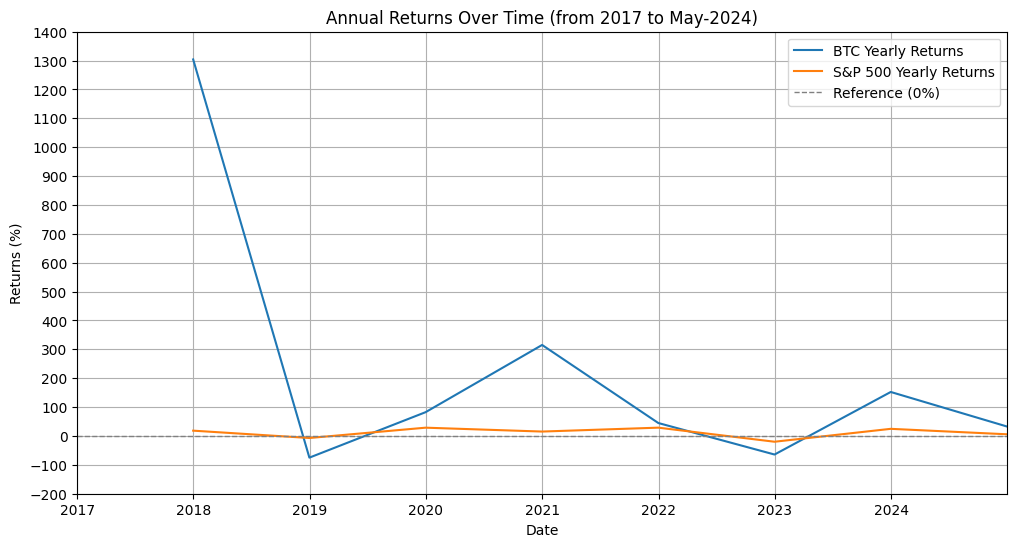

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(annual_returns.index, annual_returns['BTC_Returns_Yearly_%'], label='BTC Yearly Returns')
plt.plot(annual_returns.index, annual_returns['SP500_Returns_Yearly_%'], label='S&P 500 Yearly Returns')

# Zero line refence
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label="Reference (0%)")

# Custom Y and X axes
plt.xlim([pd.to_datetime('2017-01-01'), pd.to_datetime('2024-12-31')])
plt.ylim(-200, 1400) # Range for Y axe
plt.yticks(np.arange(-200, 1401, 100)) # using steps of 100

plt.title('Annual Returns Over Time (from 2017 to May-2024)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

#### e.g. If you invested X amount in January 2017 and then you withdraw you money at the end of December 2017, you would have had a profit of 1300%

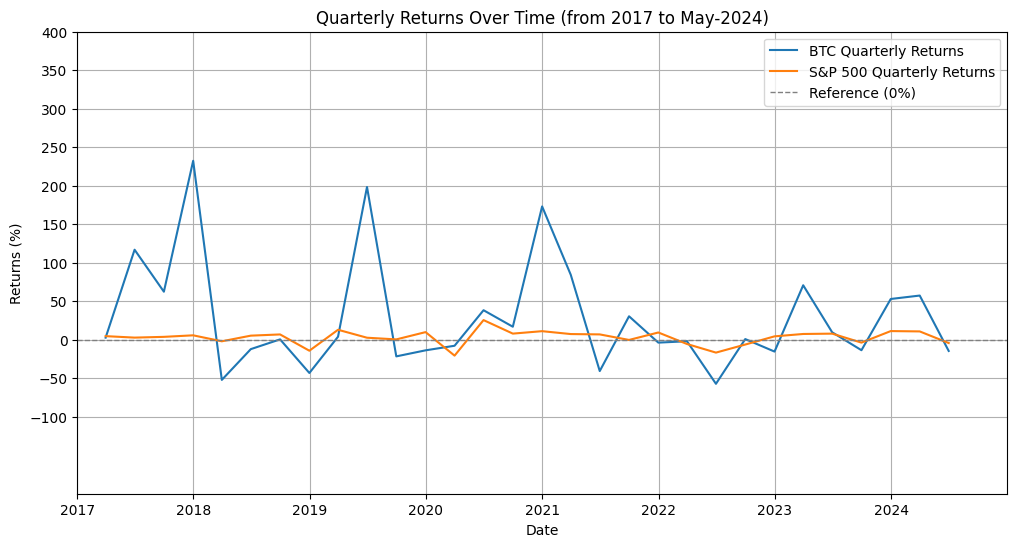

In [154]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_returns.index, quarterly_returns['BTC_Returns_Quarterly_%'], label='BTC Quarterly Returns')
plt.plot(quarterly_returns.index, quarterly_returns['SP500_Returns_Quarterly_%'], label='S&P 500 Quarterly Returns')

# Zero line refence
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label="Reference (0%)")

# Custom Y and X axes
plt.xlim([pd.to_datetime('2017-01-01'), pd.to_datetime('2024-12-31')])
plt.ylim(-200, 400) # Range for Y axe
plt.yticks(np.arange(-100, 401, 50)) # using steps of 100

plt.title('Quarterly Returns Over Time (from 2017 to May-2024)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

#### e.g. If you invested X amount in January 2017 and then you withdraw you money on March 2017, you would have had a profit of ~120%

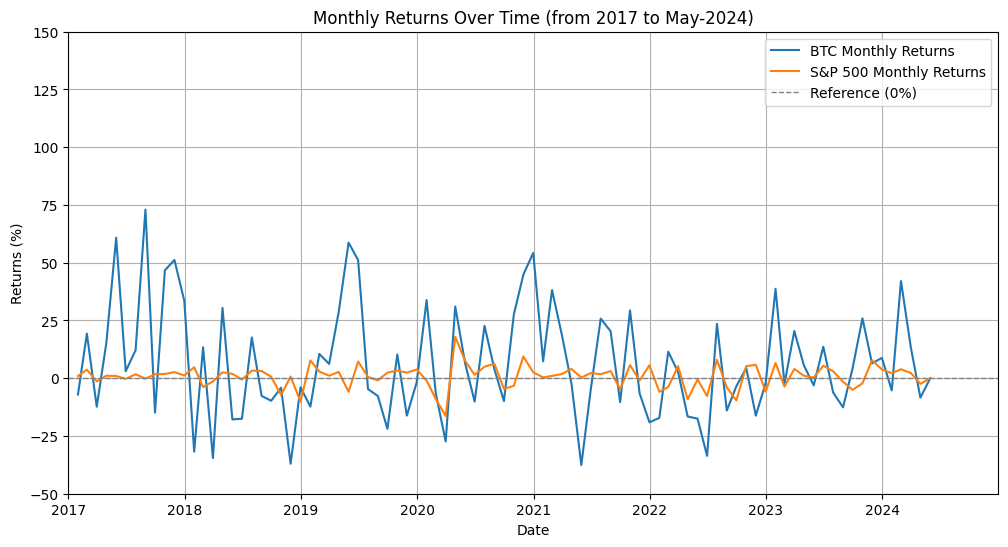

In [155]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_returns.index, monthly_returns['BTC_Returns_Monthly_%'], label='BTC Monthly Returns')
plt.plot(monthly_returns.index, monthly_returns['SP500_Returns_Monthly_%'], label='S&P 500 Monthly Returns')

# Zero line refence
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label="Reference (0%)")

# Custom Y and X axes
plt.xlim([pd.to_datetime('2017-01-01'), pd.to_datetime('2024-12-31')])
plt.ylim(-50, 150) # Range for Y axe
plt.yticks(np.arange(-50, 151, 25)) # using steps of 100

plt.title('Monthly Returns Over Time (from 2017 to May-2024)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

#### e.g. If you invested X amount in January 03 2017 and then you withdraw you money on January 31st 2017, you would have had a profit of ~20%

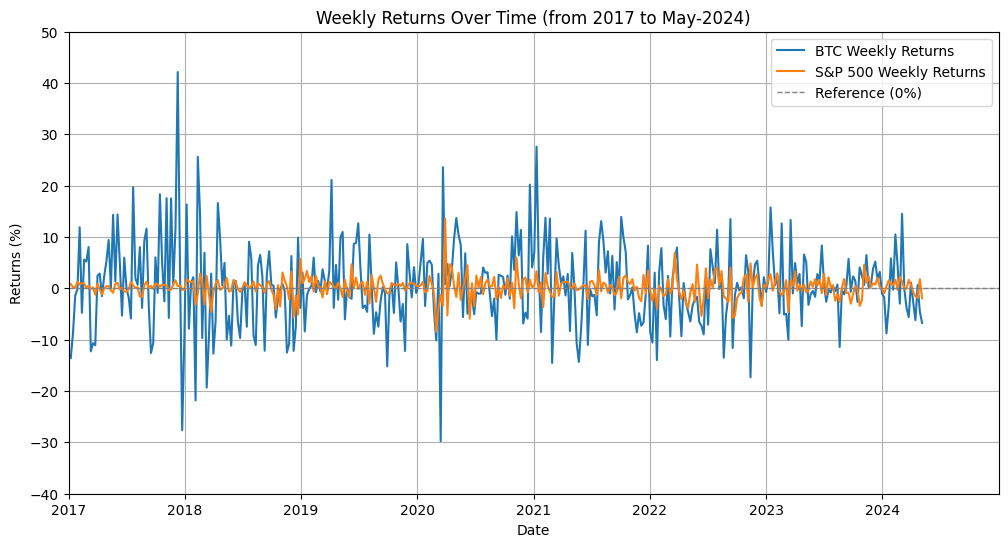

In [156]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_returns.index, weekly_returns['BTC_Returns_Weekly_%'], label='BTC Weekly Returns')
plt.plot(weekly_returns.index, weekly_returns['SP500_Returns_Weekly_%'], label='S&P 500 Weekly Returns')

# Zero line refence
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label="Reference (0%)")

# Custom Y and X axes
plt.xlim([pd.to_datetime('2017-01-01'), pd.to_datetime('2024-12-31')])
plt.ylim(-40, 50) # Range for Y axe
plt.yticks(np.arange(-40, 51, 10)) # using steps of 100

plt.title('Weekly Returns Over Time (from 2017 to May-2024)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

#### Here it basically shows that would loss money in the first week of 2017 (actually ~10% of loss)

### Key Observations and Conclusions

1. **Bitcoin's Volatility**:
   - Bitcoin exhibited extreme profitability in specific periods, particularly in 2017, where annual returns reached up to **1300%**.
   - Quarterly and monthly returns during the same year showed profits of **~120%** and **~20%**, respectively.
   - Weekly returns, however, demonstrated a significant loss of **~10%** during the first week of 2017.

2. **S&P 500's Stability**:
   - The S&P 500 provides more consistent but modest returns compared to Bitcoin.
   - This makes it a potentially safer option for risk-averse investors.

3. **Profitability**:
   - Bitcoin offers significantly higher returns during bullish periods but comes with high volatility and risk.
   - The S&P 500, while less profitable, aligns better with investors seeking stability over volatility.

4. **Patterns to Explore**:
   - There is potential for deeper insights using methods like time series forecasting (ARIMA, GARCH), machine learning (RNNs), and frequency-domain techniques (Fourier Transform, Wavelets).
   - Exploring these methods could reveal predictive patterns in returns and correlations between Bitcoin and the S&P 500.

5. **Conclusion**:
   - Bitcoin is suitable for high-risk, high-reward investors, whereas the S&P 500 appeals to those preferring steady, predictable growth.
   - Understanding the investor's risk tolerance and financial goals is crucial in determining the better option between these two assets.

## Further investigation Needed For This Proyect:
### Patterns to Explore:
1. Correlation
2. Moving Averages
3. Temporal series analysis:
   - ARIMA
   - GARCH
4. Machine learning:
   - Recurrent Neural Networks (RNN)
5. Clustering:
   - K-Means
   - DBSCAN
6. Fourier Transform
7. Wavelets